In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Please run the code from start to finish

Task 1:
Choose a dataset in CSV format (for example, you can use datasets like the Iris dataset, a sales dataset, or any dataset of your choice).
Load the dataset using pandas.

In [124]:
try:
    students = pd.read_csv('student-dataset.csv')
except FileNotFoundError as e:
    print('error: file not found!')
countries = set(students['nationality'])

Display the first few rows of the dataset using .head() to inspect the data.

In [125]:
students.head(3)

,id,name,nationality,city,latitude,longitude,gender,ethnic.group,age,english.grade,math.grade,sciences.grade,language.grade,portfolio.rating,coverletter.rating,refletter.rating
0,0,Kiana Lor,China,Suzhou,31.31,120.62,F,NaN,22,3.5,3.7,3.1,1.0,4,4.0,4
1,1,Joshua Lonaker,United States of America,Santa Clarita,34.39,-118.54,M,NaN,22,2.9,3.2,3.6,5.0,5,4.0,5
2,2,Dakota Blanco,United States of America,Oakland,37.80,-122.27,F,NaN,22,3.9,3.8,3.2,5.0,3,3.0,4


Explore the structure of the dataset by checking the data types and any missing values.

In [126]:
count = 0
for index, row in students.iterrows():
    for field in students.columns:
        if field == 'ethnic.group':
            continue
        if pd.isna(row[field]): 
            count+=1
            print(f'{field} is a blank field in line {index+1}')
print(f'Done! there are {count} number of fields that blank' if count!=0 else 'Done! There are no blank fields')

Done! There are no blank fields


Clean the dataset by either filling or dropping any missing values.

fill a specific field

In [132]:
def replace_lines(value='N/A'):
    pass

Task 2: Basic Data Analysis

In [133]:
students.drop(columns=['latitude','longitude','id']).describe()

,age,english.grade,math.grade,sciences.grade,language.grade,portfolio.rating,coverletter.rating,refletter.rating
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,21.964169,3.369707,3.414332,3.446580,4.396417,3.986971,4.110749,4.188925
std,1.248013,0.538724,0.476839,0.509081,0.996474,0.928749,0.823936,0.842193
min,19.000000,1.500000,2.100000,1.400000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,3.100000,3.100000,3.200000,4.000000,3.500000,4.000000,4.000000
50%,22.000000,3.500000,3.500000,3.600000,5.000000,4.000000,4.000000,4.000000
75%,23.000000,3.800000,3.800000,3.800000,5.000000,5.000000,5.000000,5.000000
max,26.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000


number of males and females

In [134]:
def findNumOfMalesAndFemales(searchData):
    females = searchData.loc[students['gender']=='F']
    males = searchData.loc[students['gender']=='M']
    other = searchData.loc[students['gender']=='other']
    return males,females,other

# country stats function

In [135]:
def countryStats(countryName):
    return students.loc[students['nationality']==countryName].drop(columns=['id','latitude','portfolio.rating','longitude','coverletter.rating','refletter.rating']).describe()

In [137]:
def countryStatsGenderBased(country, gender):
    return students.loc[students['nationality']==country].loc[students['gender']==gender].drop(columns=['id','latitude','portfolio.rating','longitude','refletter.rating','ethnic.group','coverletter.rating','language.grade']).describe()

# students stats per country

In [140]:
stud_per_country = {}
male_dominated_countries = []
female_dominated_countries = []
gender_equal_countries = []
for index, country in enumerate(sorted(countries)):
    student_data_per_country = students.loc[students['nationality']==country]
    total_students_per_country = len(student_data_per_country)
    males, females, other = findNumOfMalesAndFemales(student_data_per_country)
    num_males, num_females, num_other = len(males), len(females), len(other)
    
    if num_females>num_males: female_dominated_countries.append(country)
    elif num_males>num_females: male_dominated_countries.append(country)
    else: gender_equal_countries.append(country)
    
    stud_per_country[country] = {'stud_per_country':total_students_per_country,'males':num_males,'females':num_females,'other':num_other}
    print(f'{index+1}. '+country,f''' :total={stud_per_country[country]['stud_per_country']} males={stud_per_country[country]['males']}, females={stud_per_country[country]['females']} and other={stud_per_country[country]['other']}  
    {countryStats(country)}
''')
        
print('''
--------------------------------------------------------
These are countries represented equally by both genders
--------------------------------------------------------''')
for index,country_name in enumerate(gender_equal_countries): print(f'{index+1}. {country_name}')

print('''
---------------------------------------------
These are countries over represented by males
---------------------------------------------''')
for index,country_name in enumerate(male_dominated_countries): print(f'{index+1}. {country_name}')

print('''
------------------------------------------------
These are countries over represented by females
------------------------------------------------''')
for index,country_name in enumerate(female_dominated_countries): print(f'{index+1}. {country_name}')


1. Bangladesh  :total=1 males=0, females=1 and other=0  
            age  english.grade  math.grade  sciences.grade  language.grade
count   1.0            1.0         1.0             1.0             1.0
mean   20.0            3.9         3.9             3.9             5.0
std     NaN            NaN         NaN             NaN             NaN
min    20.0            3.9         3.9             3.9             5.0
25%    20.0            3.9         3.9             3.9             5.0
50%    20.0            3.9         3.9             3.9             5.0
75%    20.0            3.9         3.9             3.9             5.0
max    20.0            3.9         3.9             3.9             5.0

2. Brazil  :total=9 males=3, females=6 and other=0  
                 age  english.grade  math.grade  sciences.grade  language.grade
count   9.000000       9.000000    9.000000        9.000000        9.000000
mean   22.444444       3.577778    3.377778        3.055556        2.888889
std     1.3333

# stats of countries largely represented by females

In [47]:
students.loc[students['nationality'].isin(female_dominated_countries)].drop(columns=['id','latitude','longitude']).describe()

,age,english.grade,math.grade,sciences.grade,language.grade,portfolio.rating,coverletter.rating,refletter.rating
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,22.040541,3.354054,3.405405,3.427027,3.266216,4.000000,4.135135,4.216216
std,1.265335,0.573905,0.445646,0.497197,0.908450,0.950847,0.799389,0.815438
min,19.000000,1.700000,2.300000,1.500000,1.000000,1.000000,2.000000,2.000000
25%,21.000000,3.100000,3.025000,3.200000,3.000000,4.000000,4.000000,4.000000
50%,22.000000,3.400000,3.500000,3.600000,3.000000,4.000000,4.000000,4.000000
75%,23.000000,3.800000,3.800000,3.800000,4.000000,5.000000,5.000000,5.000000
max,25.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000


stats of countries largely represented by males

In [48]:
students.loc[students['nationality'].isin(male_dominated_countries)].drop(columns=['id','latitude','longitude']).describe()

,age,english.grade,math.grade,sciences.grade,language.grade,portfolio.rating,coverletter.rating,refletter.rating
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,21.977477,3.372523,3.438739,3.446847,4.761261,3.963964,4.108108,4.189189
std,1.227305,0.531379,0.477014,0.513055,0.712991,0.926512,0.837215,0.851015
min,19.000000,1.500000,2.100000,1.400000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,3.100000,3.200000,3.200000,5.000000,3.000000,4.000000,4.000000
50%,22.000000,3.500000,3.600000,3.600000,5.000000,4.000000,4.000000,4.000000
75%,23.000000,3.800000,3.800000,3.800000,5.000000,5.000000,5.000000,5.000000
max,26.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000


countries equally represented by both genders

In [49]:
students.loc[students['nationality'].isin(gender_equal_countries)].drop(columns=['id','latitude','longitude']).describe()

,age,english.grade,math.grade,sciences.grade,language.grade,portfolio.rating,coverletter.rating,refletter.rating
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,21.181818,3.418182,2.981818,3.572727,4.636364,4.363636,4.000000,4.000000
std,1.401298,0.481286,0.509545,0.536826,0.809040,0.809040,0.774597,0.894427
min,19.000000,2.400000,2.300000,2.500000,3.000000,3.000000,3.000000,2.000000
25%,20.000000,3.200000,2.600000,3.500000,5.000000,4.000000,3.500000,4.000000
50%,21.000000,3.500000,2.900000,3.800000,5.000000,5.000000,4.000000,4.000000
75%,22.000000,3.800000,3.400000,3.900000,5.000000,5.000000,4.500000,4.500000
max,24.000000,3.900000,3.700000,4.000000,5.000000,5.000000,5.000000,5.000000


English top 30

In [295]:
students.drop(columns=['id','latitude','portfolio.rating','longitude','sciences.grade','refletter.rating','ethnic.group','math.grade','coverletter.rating']).sort_values('english.grade',ascending=False).head(30)


,name,nationality,city,gender,age,english.grade,language.grade
174,Andrew Bishop,United States of America,Los Angeles,M,22,4.0,5.0
15,Brittany Sath,Japan,Tokyo,F,21,4.0,3.0
246,Vittoria Faulkner,United States of America,Chicago,F,22,4.0,5.0
140,Faviola Soto,Mexico,Cortazar,F,19,4.0,3.7
229,Katherine Beatty,United States of America,Los Angeles,F,19,4.0,5.0
227,Patricia Rockhold,United States of America,San Francisco,F,21,4.0,5.0
268,Bryant Ronquillo,Mexico,Aguascalientes,M,20,4.0,4.0
269,Garrett Heim,United States of America,Mobile,M,20,4.0,5.0
201,Tyler Kibel,United States of America,Santa Ana,M,24,4.0,5.0
197,Troy White,United States of America,New York,M,22,4.0,5.0


English bottom 30 students

In [310]:
students.drop(columns=['id','latitude','portfolio.rating','longitude','sciences.grade','refletter.rating','ethnic.group','math.grade','coverletter.rating']).sort_values('english.grade').head(30)

,name,nationality,city,gender,age,english.grade,language.grade
150,Abdul Jabbaar el-Abdul,Egypt,Cairo,M,20,1.5,3.0
41,Afnaan el-Mohammed,India,New Delhi,F,22,1.7,2.0
11,Sasha Jansen,United States of America,Chicago,F,21,1.7,5.0
162,Rebecca Ah Fat,China,Tangshan,F,22,1.8,4.0
53,Moira Buttitto,United States of America,Los Angeles,F,23,1.9,5.0
217,Brandilyn Hanselman,Russian Federation,Chelyabinsk,F,21,2.0,4.0
149,Vincent Webster,United States of America,New York,M,23,2.0,5.0
243,Andrew Yelich,United States of America,Boulder,M,24,2.0,5.0
186,Kayla Sales,United States of America,Quincy,F,22,2.1,5.0
47,Zoe Kern,United States of America,West Jordan,F,22,2.1,5.0


English stats

In [313]:
students.drop(columns=['id','latitude','portfolio.rating','longitude','sciences.grade','refletter.rating','ethnic.group','math.grade','coverletter.rating']).sort_values('english.grade').describe()

,age,english.grade,language.grade
count,307.000000,307.000000,307.000000
mean,21.964169,3.369707,4.396417
std,1.248013,0.538724,0.996474
min,19.000000,1.500000,1.000000
25%,21.000000,3.100000,4.000000
50%,22.000000,3.500000,5.000000
75%,23.000000,3.800000,5.000000
max,26.000000,4.000000,5.000000


# Mathematics top 30 students

In [294]:
students.drop(columns=['id','latitude','portfolio.rating','longitude','sciences.grade','refletter.rating','ethnic.group','english.grade','coverletter.rating','language.grade']).sort_values('math.grade',ascending=False).head(30)

,name,nationality,city,gender,age,math.grade
37,Katrina Saito,Japan,Tokyo,F,22,4.0
11,Sasha Jansen,United States of America,Chicago,F,21,4.0
286,Michael Griffin,United States of America,New York,M,21,4.0
182,Billy Jack Bestle,United States of America,Baltimore,M,22,4.0
129,Coleman Keelen,Spain,Callosa de Segura,M,24,4.0
122,Wesley Nunn,United States of America,Los Angeles,M,23,4.0
224,Anthony Mcdevitt,United States of America,Los Angeles,M,24,4.0
47,Zoe Kern,United States of America,West Jordan,F,22,4.0
233,Joseph Hazelton,United States of America,Oakland,M,22,4.0
176,Surya Ky,China,Tangshan,M,21,4.0


# Mathematics bottom 30 students

In [308]:
students.drop(columns=['id','latitude','portfolio.rating','longitude','sciences.grade','refletter.rating','ethnic.group','english.grade','coverletter.rating','language.grade']).sort_values('math.grade').head(30)

,name,nationality,city,gender,age,math.grade
59,Shuraih el-Karim,Pakistan,Khalabat,M,22,2.1
272,William Tierney,United States of America,New York,M,21,2.1
288,Weldon Hightower,United States of America,New York,M,20,2.1
51,Hannah Uren,United States of America,Los Angeles,F,22,2.2
73,Aurelia Davis Ingham,United States of America,Roseville,F,22,2.2
133,Andrew Kirin,United States of America,Odessa,M,25,2.2
139,Mckenzie Haycock,Canada,Toronto,F,20,2.3
57,Amanda Tatum,United States of America,San Diego,F,22,2.3
39,Aylin Mendoza,Mexico,Mexico,F,22,2.3
88,Lindsey Freund,United States of America,New York,F,20,2.3


# Maths stats

In [312]:
students.drop(columns=['id','latitude','portfolio.rating','longitude','sciences.grade','refletter.rating','ethnic.group','english.grade','coverletter.rating','language.grade']).sort_values('math.grade').describe()

,age,math.grade
count,307.000000,307.000000
mean,21.964169,3.414332
std,1.248013,0.476839
min,19.000000,2.100000
25%,21.000000,3.100000
50%,22.000000,3.500000
75%,23.000000,3.800000
max,26.000000,4.000000


# Science top 30 students

In [293]:
students.drop(columns=['id','latitude','portfolio.rating','longitude','math.grade','refletter.rating','ethnic.group','english.grade','coverletter.rating','language.grade']).sort_values('sciences.grade',ascending=False).head(30)

,name,nationality,city,gender,age,sciences.grade
306,Dane Whittemore,Canada,Toronto,M,21,4.0
170,Kaden Yates,United States of America,Salinas,M,23,4.0
219,Kyler Grieshaber,United States of America,Cohoes,M,22,4.0
215,Asad el-Yacoub,India,Thana,M,22,4.0
211,Felipe Martinez Acosta,Chile,Santiago,M,21,4.0
208,Andrew Brunelli,United States of America,New York,M,23,4.0
29,Victoria Ibarra,Dominican Republic,Santo Domingo,F,22,4.0
206,Lexi Hatton,United States of America,Los Angeles,F,23,4.0
69,Allison Brink-Lomme,United States of America,Portland,F,24,4.0
177,George Mann,Russian Federation,Moscow,M,23,4.0


# Science bottom 30 students

In [307]:
students.drop(columns=['id','latitude','portfolio.rating','longitude','math.grade','refletter.rating','ethnic.group','english.grade','coverletter.rating','language.grade']).sort_values('sciences.grade').head(30)

,name,nationality,city,gender,age,sciences.grade
194,Chue Fue Richter,China,Qiqihar,M,23,1.4
271,Jasmine Lopez,Brazil,Guaxupé,F,21,1.5
152,Shawn O Bryan,United States of America,Fairfield,M,23,1.5
67,Lindsey Job,United States of America,Los Angeles,F,23,1.8
300,Tessa Rawanduzy,United States of America,Derby,F,21,2.0
216,Holly Marshall,United States of America,San Francisco,F,22,2.0
113,Bryce Vaillancourt,United States of America,Pomona,M,22,2.1
122,Wesley Nunn,United States of America,Los Angeles,M,23,2.1
226,Abigail Gallegos,Brazil,Belém,F,24,2.1
217,Brandilyn Hanselman,Russian Federation,Chelyabinsk,F,21,2.2


# Science stats

In [311]:
students.drop(columns=['id','latitude','portfolio.rating','longitude','math.grade','refletter.rating','ethnic.group','english.grade','coverletter.rating','language.grade']).sort_values('sciences.grade').describe()

,age,sciences.grade
count,307.000000,307.000000
mean,21.964169,3.446580
std,1.248013,0.509081
min,19.000000,1.400000
25%,21.000000,3.200000
50%,22.000000,3.600000
75%,23.000000,3.800000
max,26.000000,4.000000


Canada analysis

In [318]:
students.loc[students['nationality']=='Canada'].drop(columns=['id','latitude','portfolio.rating','longitude','ethnic.group']).describe()

,age,english.grade,math.grade,sciences.grade,language.grade,coverletter.rating,refletter.rating
count,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000
mean,21.285714,3.657143,3.014286,3.600000,5.0,3.857143,4.000000
std,1.496026,0.263674,0.539841,0.493288,0.0,0.690066,1.154701
min,20.000000,3.200000,2.300000,2.600000,5.0,3.000000,2.000000
25%,20.000000,3.500000,2.650000,3.500000,5.0,3.500000,3.500000
50%,21.000000,3.800000,3.000000,3.700000,5.0,4.000000,4.000000
75%,22.000000,3.850000,3.400000,3.950000,5.0,4.000000,5.000000
max,24.000000,3.900000,3.700000,4.000000,5.0,5.000000,5.000000


In [316]:
students.loc[students['nationality']=='Canada'].loc[students['gender']=='M'].drop(columns=['id','latitude','portfolio.rating','longitude','sciences.grade','refletter.rating','ethnic.group','english.grade','coverletter.rating','language.grade']).describe()

,age,math.grade
count,3.000000,3.000000
mean,21.666667,2.833333
std,2.081666,0.404145
min,20.000000,2.400000
25%,20.500000,2.650000
50%,21.000000,2.900000
75%,22.500000,3.050000
max,24.000000,3.200000


# GRAPHS

# Gender distribution

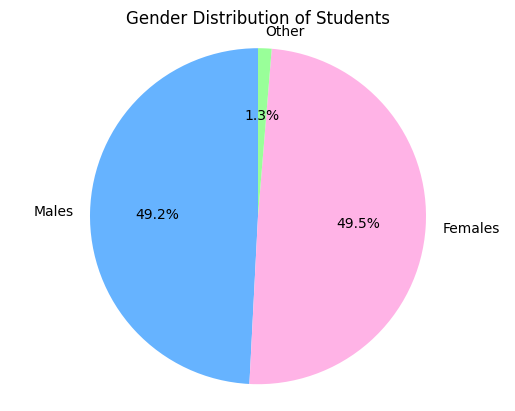

In [182]:
males = len(students.loc[students['gender'] == 'M'])
females = len(students.loc[students['gender'] == 'F'])
other = len(students.loc[students['gender'] == 'other'])

people = [males, females, other]
labels = ['Males', 'Females', 'Other']

colors = ['#66b3ff', '#ffb3e6', '#99ff99']

fig, ax = plt.subplots()
ax.pie(people, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

ax.axis('equal')  

ax.set_title('Gender Distribution of Students')

plt.show()

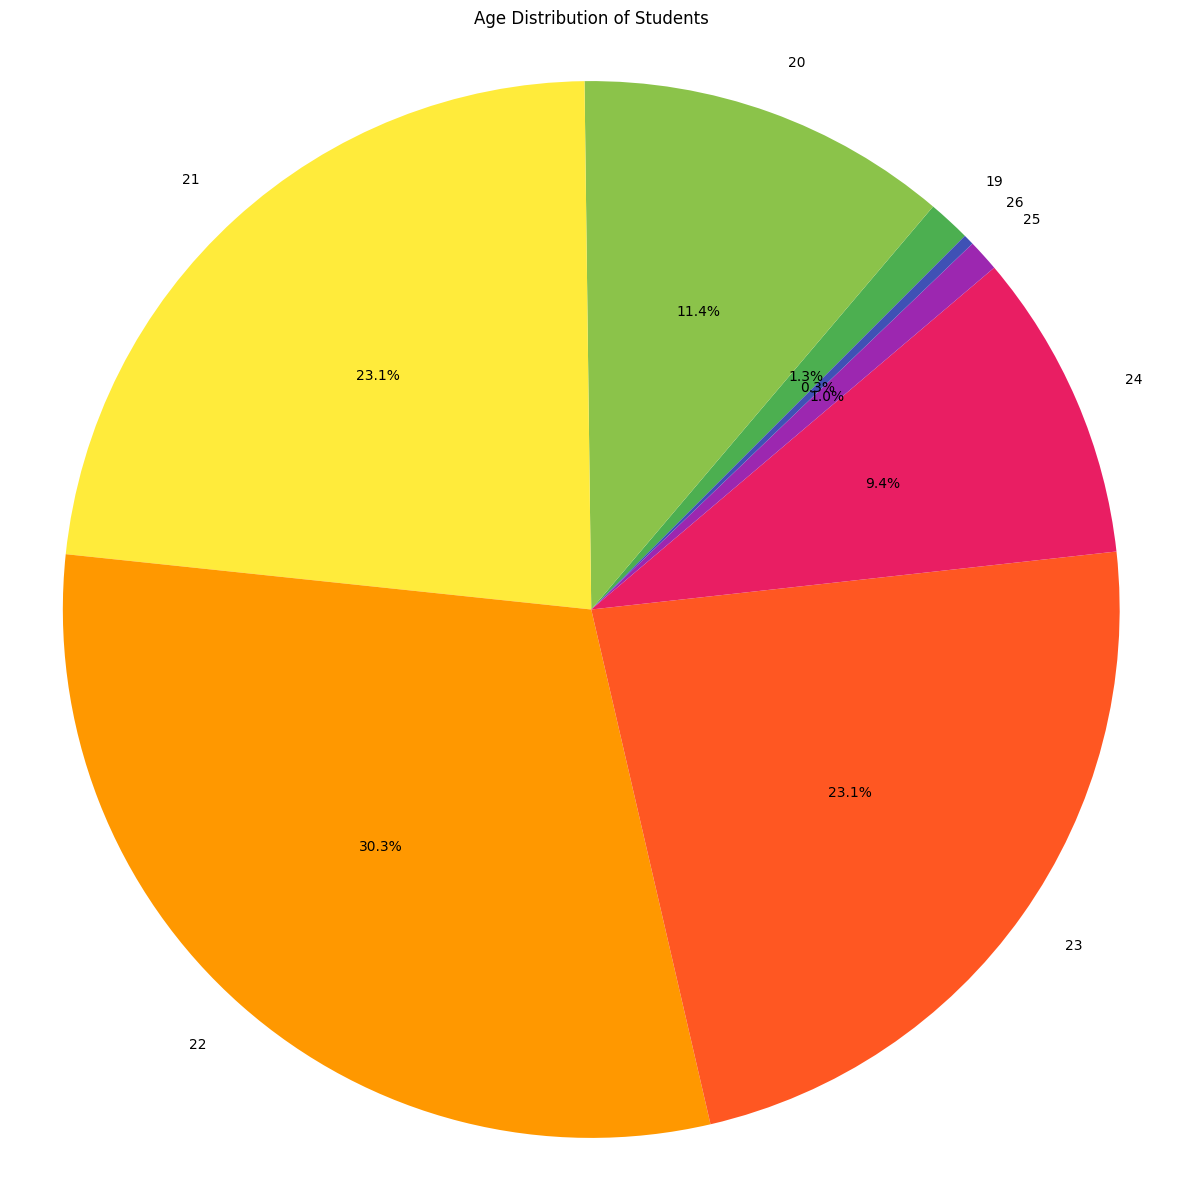

In [181]:
age_groups = {f'age-{i}': len(students.loc[students['age'] == i]) for i in range(19, 27)}
people = [age_groups[f'age-{i}'] for i in range(19, 27)]
labels = ['19', '20', '21', '22', '23', '24', '25', '26']
colors = ['#4CAF50', '#8BC34A', '#FFEB3B', '#FF9800', '#FF5722', '#E91E63', '#9C27B0', '#3F51B5']
fig, ax = plt.subplots(figsize=(15, 15))
ax.pie(people, labels=labels, autopct='%1.1f%%', startangle=45, colors=colors)
ax.axis('equal')
ax.set_title('Age Distribution of Students')
plt.show()


# Mean Grades by Country 

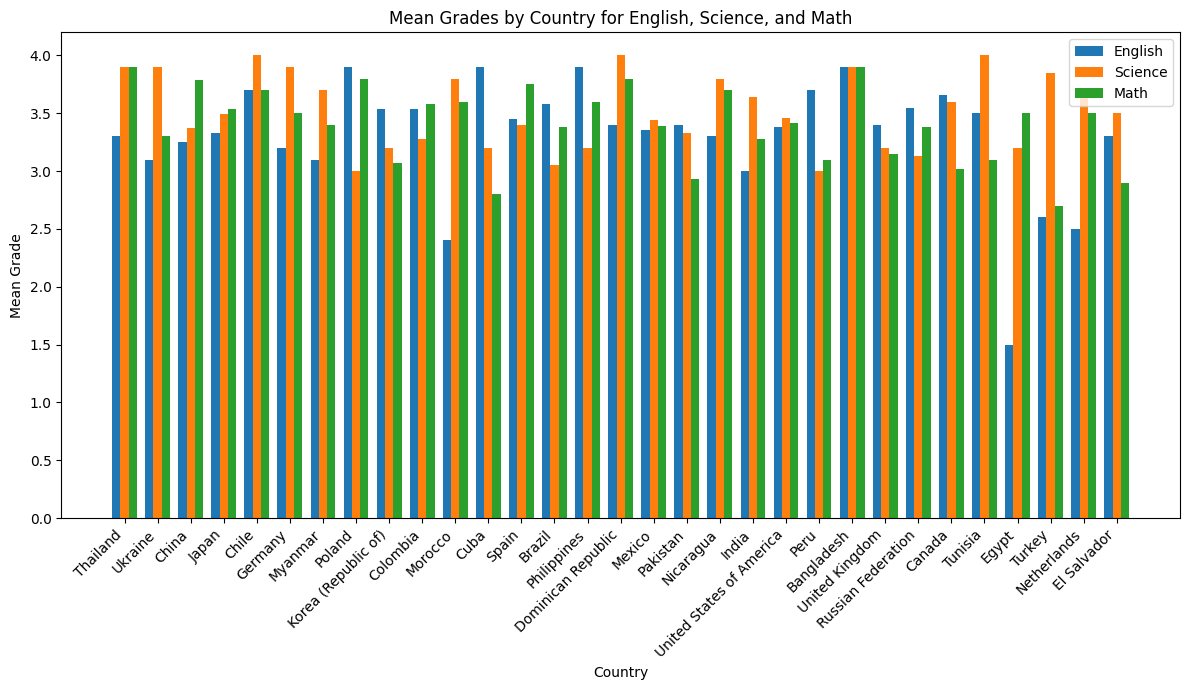

In [183]:

data = {
    country: [
        students.loc[students['nationality'] == country]['english.grade'].mean(),
        students.loc[students['nationality'] == country]['sciences.grade'].mean(),
        students.loc[students['nationality'] == country]['math.grade'].mean()
    ] for country in countries
}

countries = list(data.keys())
english_grades = [data[country][0] for country in countries]
sciences_grades = [data[country][1] for country in countries]
math_grades = [data[country][2] for country in countries]

bar_width = 0.25  
index = np.arange(len(countries)) 

fig, ax = plt.subplots(figsize=(12, 7)) 

bar1 = ax.bar(index - bar_width, english_grades, bar_width, label='English')
bar2 = ax.bar(index, sciences_grades, bar_width, label='Science')
bar3 = ax.bar(index + bar_width, math_grades, bar_width, label='Math')

ax.set_xlabel('Country')
ax.set_ylabel('Mean Grade')
ax.set_title('Mean Grades by Country for English, Science, and Math')
ax.set_xticks(index)
ax.set_xticklabels(countries, rotation=45, ha='right')

ax.legend()

plt.tight_layout()
plt.show()

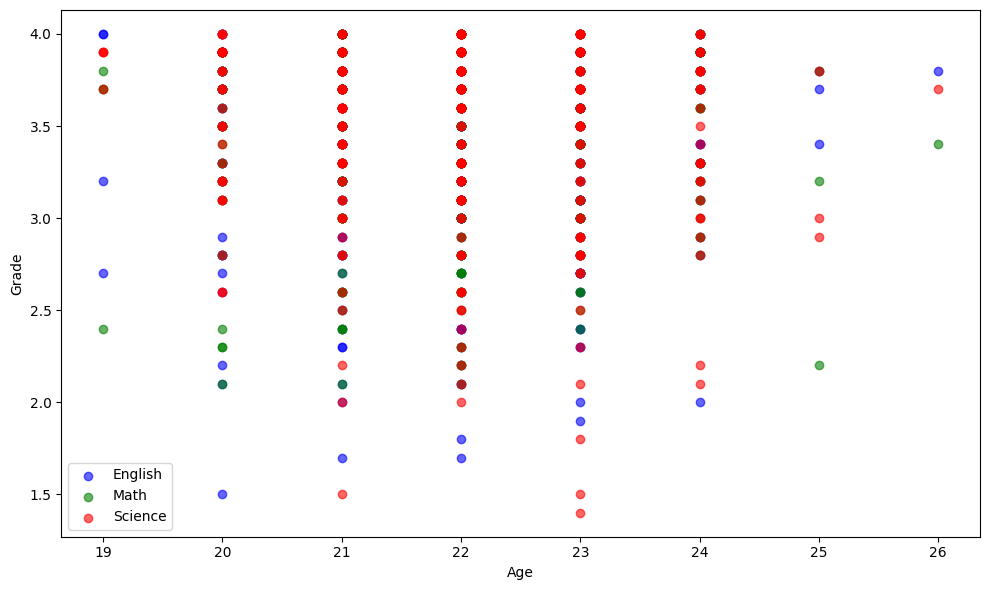

In [185]:
plt.figure(figsize=(10, 6))
plt.scatter(students['age'], students['english.grade'], label='English', alpha=0.6, color='blue')
plt.scatter(students['age'], students['math.grade'], label='Math', alpha=0.6, color='green')
plt.scatter(students['age'], students['sciences.grade'], label='Science', alpha=0.6, color='red')

plt.xlabel('Age')
plt.ylabel('Grade')
# plt.title('Age vs Grade in Different Subjects')
plt.legend()
plt.tight_layout()
plt.show()